# Salary Prediction

In [1]:
import pandas as pd
import numpy as np

#importing the dataset

df=pd.read_csv("salary.csv")

In [2]:
type(df)

pandas.core.frame.DataFrame

In [3]:
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329


In [4]:
df.head()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500


In [5]:
df.tail()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329
396,AsstProf,A,8,4,Male,81035


In [6]:
df.sample(5)

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
325,AsstProf,B,8,4,Male,84500
154,AsstProf,B,4,0,Male,92000
301,Prof,A,27,16,Male,127100
245,Prof,A,17,11,Female,90450
251,Prof,A,20,8,Male,102000


In [7]:
df.columns

Index(['rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex', 'salary'], dtype='object')

In [8]:
df.shape

(397, 6)

In [9]:
df.dtypes

rank             object
discipline       object
yrs.since.phd     int64
yrs.service       int64
sex              object
salary            int64
dtype: object

In [10]:
null=df.isnull().sum()
null

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

# EDA

In [12]:
#doing the count plot for categorical data

Prof         266
AsstProf      67
AssocProf     64
Name: rank, dtype: int64


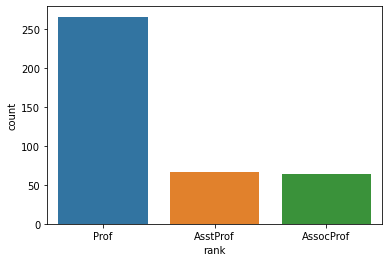

In [13]:
sns.countplot(df['rank'])
print(df['rank'].value_counts())

-it can be seen that the data is not well balanced

B    216
A    181
Name: discipline, dtype: int64


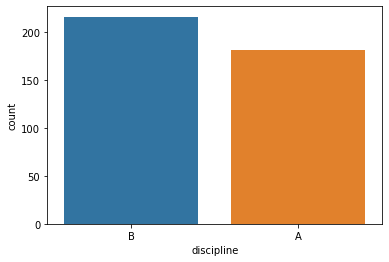

In [14]:
sns.countplot(df['discipline'])
print(df['discipline'].value_counts())


Male      358
Female     39
Name: sex, dtype: int64


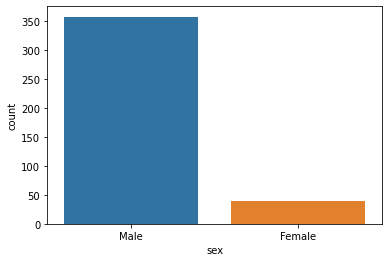

In [15]:
sns.countplot(df['sex'])
print(df['sex'].value_counts())

<AxesSubplot:xlabel='yrs.since.phd', ylabel='salary'>

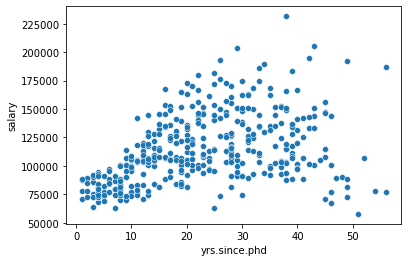

In [16]:
sns.scatterplot('yrs.since.phd','salary',data=df)

-it can be seen that the data is not distributed normally throught the ranges

<AxesSubplot:xlabel='yrs.service', ylabel='salary'>

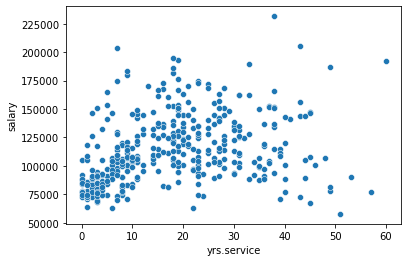

In [17]:
sns.scatterplot('yrs.service','salary',data=df)

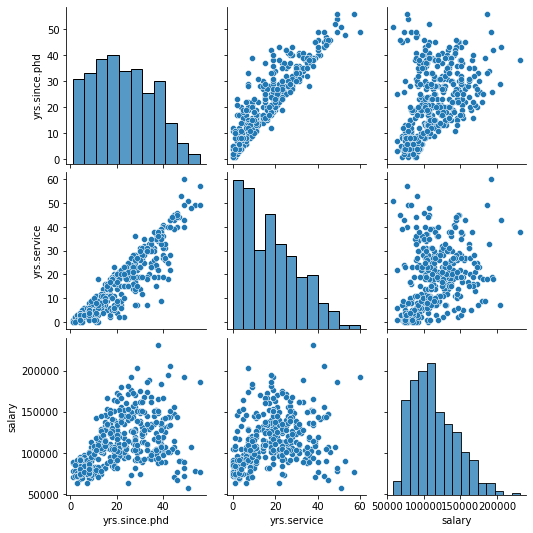

In [18]:
sns.pairplot(df)

In [19]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [20]:
list1=['rank','discipline','sex']
for val in list1:
    df[val]=le.fit_transform(df[val])

In [21]:
df.dtypes

rank             int32
discipline       int32
yrs.since.phd    int64
yrs.service      int64
sex              int32
salary           int64
dtype: object

# correlation:

In [22]:
df.corr()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
rank,1.000000,-0.086266,0.525500,0.447499,0.132492,0.522207
discipline,-0.086266,1.000000,-0.218087,-0.164599,0.003724,0.156084
yrs.since.phd,0.525500,-0.218087,1.000000,0.909649,0.148788,0.419231
yrs.service,0.447499,-0.164599,0.909649,1.000000,0.153740,0.334745
sex,0.132492,0.003724,0.148788,0.153740,1.000000,0.138610
salary,0.522207,0.156084,0.419231,0.334745,0.138610,1.000000


In [23]:
df.corr()['salary'].sort_values()

sex              0.138610
discipline       0.156084
yrs.service      0.334745
yrs.since.phd    0.419231
rank             0.522207
salary           1.000000
Name: salary, dtype: float64

-so we can see that: 

- all the columns are positively correlated with target variable

-the 'rank','yrs.since.phd' and 'yrs.service' columns have a strong correlation with outcome variable.

-while 'sex' and 'discipline' columns have weak correlation with the target variable.

<AxesSubplot:>

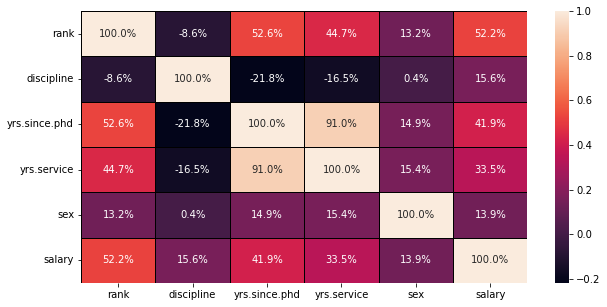

In [24]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True,linewidth=0.5,linecolor='Black',fmt='.1%')

# describing our dataset:

In [25]:
df.describe()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,1.508816,0.544081,22.314861,17.614610,0.901763,113706.458438
std,0.757486,0.498682,12.887003,13.006024,0.298010,30289.038695
min,0.000000,0.000000,1.000000,0.000000,0.000000,57800.000000
25%,1.000000,0.000000,12.000000,7.000000,1.000000,91000.000000
50%,2.000000,1.000000,21.000000,16.000000,1.000000,107300.000000
75%,2.000000,1.000000,32.000000,27.000000,1.000000,134185.000000
max,2.000000,1.000000,56.000000,60.000000,1.000000,231545.000000


Text(0.5, 1.0, 'Variable Summary')

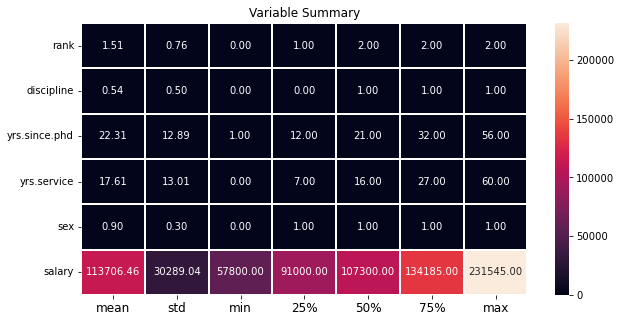

In [26]:
plt.figure(figsize=(10,5))
sns.heatmap(round(df.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt='.2f')
plt.xticks(fontsize=18)
plt.xticks(fontsize=12)
plt.title('Variable Summary')

# skewness:

In [27]:
df.skew()

rank            -1.151164
discipline      -0.177684
yrs.since.phd    0.300880
yrs.service      0.650569
sex             -2.709958
salary           0.714568
dtype: float64

# Normal distribution curve:

<AxesSubplot:xlabel='rank', ylabel='Density'>

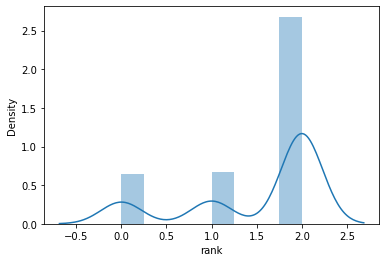

In [28]:
sns.distplot(df['rank'])

<AxesSubplot:xlabel='sex', ylabel='Density'>

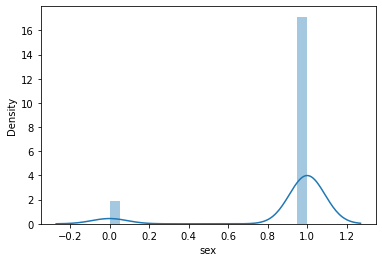

In [29]:
sns.distplot(df['sex'])

<AxesSubplot:xlabel='salary', ylabel='Density'>

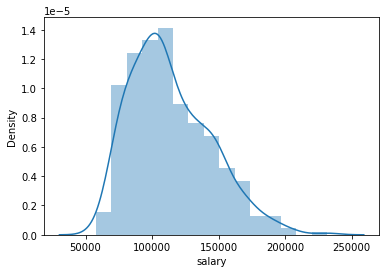

In [30]:
sns.distplot(df['salary'])

# data cleaning:

rank                AxesSubplot(0.125,0.125;0.110714x0.755)
discipline       AxesSubplot(0.257857,0.125;0.110714x0.755)
yrs.since.phd    AxesSubplot(0.390714,0.125;0.110714x0.755)
yrs.service      AxesSubplot(0.523571,0.125;0.110714x0.755)
sex              AxesSubplot(0.656429,0.125;0.110714x0.755)
salary           AxesSubplot(0.789286,0.125;0.110714x0.755)
dtype: object

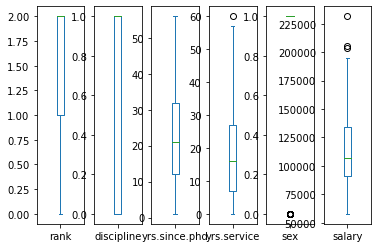

In [31]:
df.plot(kind='box',layout=(1,6),subplots=True)

-very few outliers present in most correlated columns

In [32]:
df.drop('sex',axis=1,inplace=True)

-as it is weakly correlated with target

In [33]:
#checking the outliers

from scipy.stats import zscore
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([ 43, 131, 330, 364], dtype=int64), array([4, 3, 3, 4], dtype=int64))

In [34]:
df_new=df[(z<3).all(axis=1)]

In [35]:
print(df.shape,df_new.shape)

(397, 5) (393, 5)


In [36]:
#percentage data loss:

data_loss=((397-393)/397)*100
data_loss

1.0075566750629723

-as the data loss is too less we will remove the few outliers.

In [37]:
df_new.shape

(393, 5)

In [38]:
df_new.skew()

rank            -1.135734
discipline      -0.179514
yrs.since.phd    0.288531
yrs.service      0.588861
salary           0.581098
dtype: float64

In [39]:
#now settling our variables

x=df_new.iloc[:,:-1]
y=df_new.iloc[:,-1]

In [40]:
x.skew()

rank            -1.135734
discipline      -0.179514
yrs.since.phd    0.288531
yrs.service      0.588861
dtype: float64

In [43]:
from sklearn.preprocessing import power_transform

x1=power_transform(x,method='yeo-johnson')

In [44]:
x2=power_transform(x1,method='yeo-johnson')

In [45]:
x=pd.DataFrame(x2)

In [46]:
x.skew()

0   -0.718001
1   -0.179514
2   -0.011714
3   -0.007517
dtype: float64

In [47]:
#scaling our input variable

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

In [48]:
x=pd.DataFrame(x)

In [49]:
#checking multicollinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [50]:
def vif_calc():
    vif=pd.DataFrame()
    vif['VIF Factor']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif['features']=x.columns
    print(vif)

In [51]:
vif_calc()

   VIF Factor  features
0    1.877747         0
1    1.063268         1
2    6.813692         2
3    5.745147         3


In [52]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [53]:
lr=LinearRegression()

In [54]:
for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=.20)
    lr.fit(x_train,y_train)
    predtrain=lr.predict(x_train)
    predtest=lr.predict(x_test)
    if r2_score(y_test,predtest)*100>60:
        print('At random state',i,':')
        print('Training accuracy score is',r2_score(y_train,predtrain)*100)
        print('Testing accuracy score is',r2_score(y_test,predtest)*100,'\n')

At random state 194 :
Training accuracy score is 40.07332052787799
Testing accuracy score is 60.341860862152096 

At random state 402 :
Training accuracy score is 39.857353783185225
Testing accuracy score is 64.63415681366432 

At random state 546 :
Training accuracy score is 39.50745652792562
Testing accuracy score is 61.556741763401625 

At random state 747 :
Training accuracy score is 40.32124612203846
Testing accuracy score is 60.38787737215989 

At random state 768 :
Training accuracy score is 39.277523081378064
Testing accuracy score is 60.70806410554008 

At random state 822 :
Training accuracy score is 40.16692849478378
Testing accuracy score is 60.05602905285945 



In [55]:
#so the model is giving maximum accuracy with random_state=768

x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=768,test_size=.20)
lr.fit(x_train,y_train)
predtrain=lr.predict(x_train)
predtest=lr.predict(x_test)
print('Training accuracy score is',r2_score(y_train,predtrain)*100)
print('Testing accuracy score is',r2_score(y_test,predtest)*100,'\n')

Training accuracy score is 39.277523081378064
Testing accuracy score is 60.70806410554008 



In [56]:
#cross validating

from sklearn.model_selection import cross_val_score

In [57]:
for j in range(2,10):
    lss=cross_val_score(lr,x,y,cv=j)
    lsc=lss.mean()
    print('At cv=',j)
    print('Cross Validation Score is:',lsc*100)
    print('Accuracy score is:',r2_score(y_test,predtest)*100,'\n')

At cv= 2
Cross Validation Score is: 40.0085281691405
Accuracy score is: 60.70806410554008 

At cv= 3
Cross Validation Score is: 38.68562210981653
Accuracy score is: 60.70806410554008 

At cv= 4
Cross Validation Score is: 40.11879779173074
Accuracy score is: 60.70806410554008 

At cv= 5
Cross Validation Score is: 38.82044099298193
Accuracy score is: 60.70806410554008 

At cv= 6
Cross Validation Score is: 40.38709392975971
Accuracy score is: 60.70806410554008 

At cv= 7
Cross Validation Score is: 39.78905328383293
Accuracy score is: 60.70806410554008 

At cv= 8
Cross Validation Score is: 40.97233158064262
Accuracy score is: 60.70806410554008 

At cv= 9
Cross Validation Score is: 38.97646730638507
Accuracy score is: 60.70806410554008 



In [58]:
#regularization:

In [59]:
from sklearn.linear_model import Lasso,Ridge
from sklearn.model_selection import GridSearchCV

parameters={'alpha':[.0001,.001,.01,.1,1,10],'random_state':list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'alpha': 10, 'random_state': 0}


In [60]:
ls=Lasso(alpha=10,random_state=0)
ls.fit(x_train,y_train)
lspred=ls.predict(x_test)
lss=r2_score(y_test,lspred)
lss*100

60.690783192382824

In [61]:
#ensemble technique:

In [62]:
from sklearn.ensemble import RandomForestRegressor

In [63]:
parameters={'criterion':['mse','mae'],'max_features':['auto','sqrt','log2']}
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'criterion': 'mae', 'max_features': 'log2'}


In [64]:
rf=RandomForestRegressor(criterion='mae',max_features='sqrt')
rf.fit(x_train,y_train)
predtrf=rf.predict(x_test)

In [65]:
print(r2_score(y_test,predtrf))

0.509613922815457


In [66]:
from sklearn.ensemble import AdaBoostRegressor

In [67]:
b=AdaBoostRegressor()
b.fit(x_train,y_train)
predb=b.predict(x_test)

In [68]:
r2_score(predb,y_test)

0.13398971222513612

In [69]:
print('The Model is performing very poor')
print('with accuracy score:',r2_score(y_test,predtest)*100)
print('cross validation score:',cross_val_score(lr,x,y,cv=8).mean()*100)

The Model is performing very poor
with accuracy score: 60.70806410554008
cross validation score: 40.97233158064262


In [70]:
#so we will save simple regression file only:

import pickle
filename='salaryprediction.pkl'
pickle.dump(lr,open(filename,'wb'))